# Fuzzy logic

Install following prerequisities:

In [ ]:
# Example
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=c01158bd1ae93d7de529cc04a2a479d73e9869a0df8033f1116dbaeebeeee7a5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# Example 1

Create fuzzy sets for input variable temperature


In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-13,-8,-5,0])
warm = fuzz.trapmf(temp_x, [8,12,16,20])
very_hot =fuzz.trapmf(temp_x, [25,30,35,40])
plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)




## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

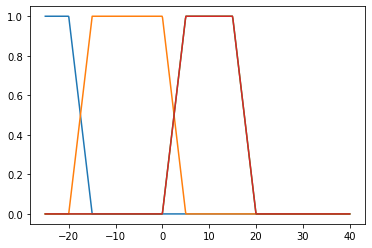

In [ ]:
Write your code here

In [ ]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=078d9dced70fd87992e87817d4c62afd6c1e05769b5863952be424136a524e3d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


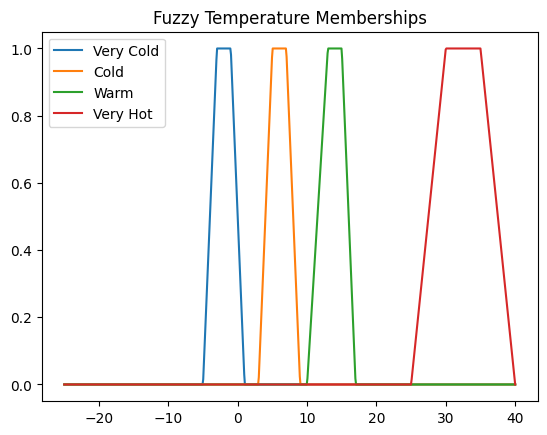

0.5
0.5
0.0

membership_very_cold : 0.0

 membership_cold : 0.0

 membership_warm : 0.0

 membership_hot : 0.0


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

temp_x = np.linspace(-25,40,650)
very_cold = fuzz.trapmf(temp_x, [-5, -3, -1, 1])
cold= fuzz.trapmf(temp_x, [3, 5, 7, 9])
warm = fuzz.trapmf(temp_x, [10,13,15,17])
hot = fuzz.trapmf(temp_x, [19,21,23,25])

plt.plot(temp_x, very_cold, label="Very Cold")
plt.plot(temp_x, cold, label="Cold")
plt.plot(temp_x, warm,label="Warm")
plt.plot(temp_x, very_hot,label="Very Hot")
plt.title("Fuzzy Temperature Memberships")
plt.legend()
plt.show()

print(fuzz.interp_membership(temp_x,very_cold,0))
print(fuzz.interp_membership(temp_x,very_cold,-4))
print(fuzz.interp_membership(temp_x,very_cold,-20))

temperature_value = 30

# Calculate membership values for the temperature in each fuzzy set
membership_very_cold = fuzz.interp_membership(temp_x, very_cold, temperature_value)
print("\nmembership_very_cold :",membership_very_cold )
membership_cold = fuzz.interp_membership(temp_x, cold, temperature_value)
print("\n membership_cold :",membership_cold )
membership_warm = fuzz.interp_membership(temp_x, warm, temperature_value)
print("\n membership_warm :",membership_warm )
membership_hot = fuzz.interp_membership(temp_x, hot, temperature_value)
print("\n membership_hot :",membership_hot )





## Task 2

Create fuzzy sets low, medium, high for heating.

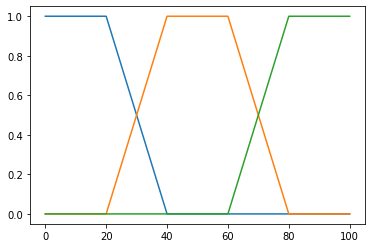

In [ ]:
Write your code here

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp  = ctrl.Antecedent(np.arange(-25, 40, 1), 'temp')
window      = ctrl.Antecedent(np.arange(0,100, 1), 'window')
# temp      = ctrl.Antecedent(np.arange(5, 18, 1), 'cold')
# temp = ctrl.Antecedent(np.arange(-25,5 , 1), 'very_cold')

heating = ctrl.Consequent(np.arange(0,100, 1), 'heating')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# hot.automf(3)
# warm.automf(5)
# cold.automf(7)
# very_cold.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
heating['low'] = fuzz.trimf(heating.universe, [-5, 0, 7])
heating['medium'] = fuzz.trimf(heating.universe, [15,20,25])
heating['high'] = fuzz.trimf(heating.universe, [30,33,35])

temp['hot'] = fuzz.trapmf(temp.universe, [30,33,35,40])
temp['warm'] = fuzz.trapmf(temp.universe, [15,20,25,30])
temp['cold'] = fuzz.trapmf(temp.universe, [2,5,10,15])
temp['very_cold'] = fuzz.trapmf(temp.universe, [-25,-20,-15,0])


window['open'] = fuzz.trapmf(window.universe, [0,10,20,30])
window['middle'] = fuzz.trapmf(window.universe, [35,50,60,70])
window['closed'] = fuzz.trapmf(window.universe, [75,80,90,100])
# window['cold'] = fuzz.trapmf(window.universe, [2,5,10,15])
# temp['very_cold'] = fuzz.trapmf(window.universe, [-25,-20,-15,0])







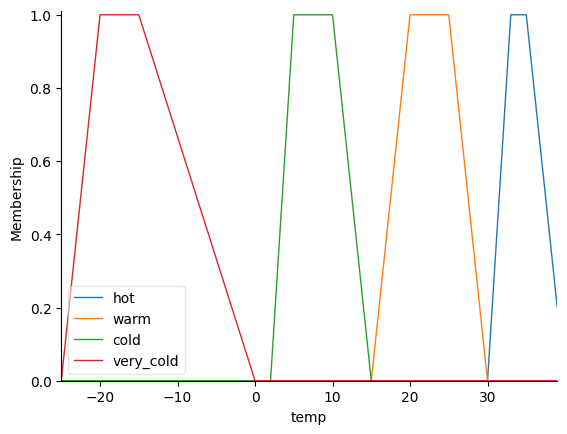

In [ ]:
# You can see how these look with .view()
temp.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

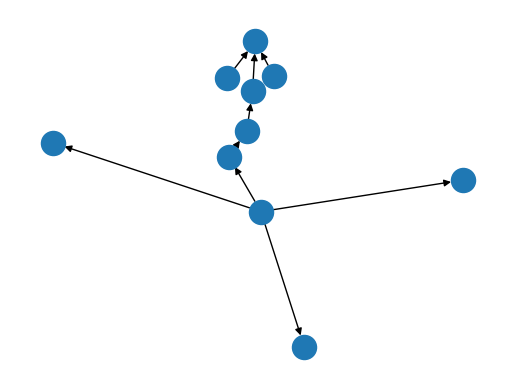

In [ ]:
rule1 = ctrl.Rule(temp['hot'] , heating['low'])
rule2 = ctrl.Rule(temp['very_cold'] , heating['high'])

rule3 = ctrl.Rule(temp['cold'] & window['closed'], heating['medium'])
rule4 = ctrl.Rule(temp['warm'] & window['open'], heating['medium'])
rule5 = ctrl.Rule(temp['warm'] & window['closed'], heating['low'])
rule6 = ctrl.Rule(temp['cold'] & window['open'], heating['high'])
rule7 = ctrl.Rule(temp['warm'] & window['middle'], heating['low'])
# rule1 = ctrl.Rule(temp['hot'], heating['low'], window['low'])
# rule2 = ctrl.Rule(service['average'], tip['medium'])
# rule3 = ctrl.Rule(service['good'] |  quality['good'], tip['high'])

rule1.view()
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

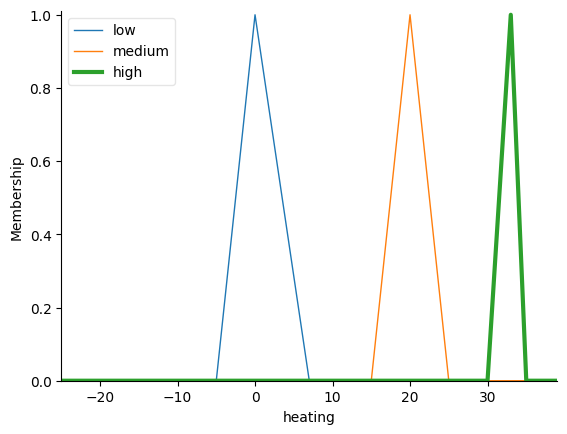

In [ ]:
# You can see how these look with .view()
heating['high'].view()

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

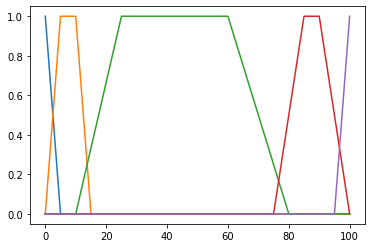

In [ ]:
Write your code here